## Pre-procesamiento

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Preprocesamiento de texto
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/gambling.csv')
index = pd.MultiIndex.from_frame(df.loc[:, ['user', 'date']])
df.set_index(index, inplace = True)

In [ ]:
user_data_df = df.loc[:, ['title', 'text']]
user_data_df

title  \
user date                                                   
6157 2021-08-25 13:03:25                              NaN   
     2021-08-26 12:44:29                              NaN   
     2021-08-26 12:45:56                              NaN   
     2021-08-27 10:19:17                              NaN   
     2021-08-29 18:38:24                              NaN   
...                                                   ...   
3988 2022-10-24 19:34:52       Pussy eaters here's a gift   
     2022-10-24 19:43:31  Can this doll sit on your face?   
     2022-10-24 19:45:16    Born to have your dick in me    
     2022-10-24 20:10:54              I need pussy eaters   
     2022-10-24 20:13:17   Here's a gift for pussy eaters   

                                                                       text  
user date                                                                    
6157 2021-08-25 13:03:25                       He is just playing GTA 5 man  
     2021-08-26 12:44:29                        kariyu will stare than play  
     2021-08-26 12:45:56                           me in my dreams be like:  
     2021-08-27 10:19:17                                                727  
     2021-08-29 18:38:24  Doom bc that game is soooo good i liked the gu...  
...                                                                     ...  
3988 2022-10-24 19:34:52                                                NaN  
     2022-10-24 19:43:31                                                NaN  
     2022-10-24 19:45:16                                                NaN  
     2022-10-24 20:10:54                                                NaN  
     2022-10-24 20:13:17                                                NaN  

[1102871 rows x 2 columns]

In [ ]:
user_data_df['comment'] = user_data_df['title'].fillna('') + '. ' + user_data_df['text'].fillna('')
user_data_df

title  \
user date                                                   
6157 2021-08-25 13:03:25                              NaN   
     2021-08-26 12:44:29                              NaN   
     2021-08-26 12:45:56                              NaN   
     2021-08-27 10:19:17                              NaN   
     2021-08-29 18:38:24                              NaN   
...                                                   ...   
3988 2022-10-24 19:34:52       Pussy eaters here's a gift   
     2022-10-24 19:43:31  Can this doll sit on your face?   
     2022-10-24 19:45:16    Born to have your dick in me    
     2022-10-24 20:10:54              I need pussy eaters   
     2022-10-24 20:13:17   Here's a gift for pussy eaters   

                                                                       text  \
user date                                                                     
6157 2021-08-25 13:03:25                       He is just playing GTA 5 man   
     2021-08-26 12:44:29                        kariyu will stare than play   
     2021-08-26 12:45:56                           me in my dreams be like:   
     2021-08-27 10:19:17                                                727   
     2021-08-29 18:38:24  Doom bc that game is soooo good i liked the gu...   
...                                                                     ...   
3988 2022-10-24 19:34:52                                                NaN   
     2022-10-24 19:43:31                                                NaN   
     2022-10-24 19:45:16                                                NaN   
     2022-10-24 20:10:54                                                NaN   
     2022-10-24 20:13:17                                                NaN   

                                                                    comment  
user date                                                                    
6157 2021-08-25 13:03:25                     . He is just playing GTA 5 man  
     2021-08-26 12:44:29                      . kariyu will stare than play  
     2021-08-26 12:45:56                         . me in my dreams be like:  
     2021-08-27 10:19:17                                              . 727  
     2021-08-29 18:38:24  . Doom bc that game is soooo good i liked the ...  
...                                                                     ...  
3988 2022-10-24 19:34:52                       Pussy eaters here's a gift.   
     2022-10-24 19:43:31                  Can this doll sit on your face?.   
     2022-10-24 19:45:16                    Born to have your dick in me .   
     2022-10-24 20:10:54                              I need pussy eaters.   
     2022-10-24 20:13:17                   Here's a gift for pussy eaters.   

[1102871 rows x 3 columns]

In [ ]:
df_users_cat = pd.read_csv('/content/drive/MyDrive/risk_golden_truth.txt', header=None)
#index = pd.MultiIndex.from_frame(df.loc[:, ['user', 'date']])
#df.set_index(index, inplace = True)
df_users_cat_ = pd.DataFrame()
df_users_cat_[['user', 'cat']] = df_users_cat[0].str.extract(r'subject(\d+) (\d+)')
df_users_cat_['user'] = df_users_cat_['user'].astype(int)
df_users_cat_

,user,cat
0,725,1
1,8790,1
2,7229,1
3,1530,1
4,3517,1
...,...,...
2169,1965,0
2170,9468,0
2171,2771,0
2172,1816,0


In [ ]:
#user_data_df["user"] = df["user"]
#user_data_df

In [ ]:
user_data_df = user_data_df.reset_index().merge(df_users_cat_, on='user', how='outer')

In [ ]:
user_data_df

,user,date,title,text,comment,cat
0,6157,2021-08-25 13:03:25,NaN,He is just playing GTA 5 man,. He is just playing GTA 5 man,0
1,6157,2021-08-26 12:44:29,NaN,kariyu will stare than play,. kariyu will stare than play,0
2,6157,2021-08-26 12:45:56,NaN,me in my dreams be like:,. me in my dreams be like:,0
3,6157,2021-08-27 10:19:17,NaN,727,. 727,0
4,6157,2021-08-29 18:38:24,NaN,Doom bc that game is soooo good i liked the gu...,. Doom bc that game is soooo good i liked the ...,0
...,...,...,...,...,...,...
1102866,3988,2022-10-24 19:34:52,Pussy eaters here's a gift,NaN,Pussy eaters here's a gift.,0
1102867,3988,2022-10-24 19:43:31,Can this doll sit on your face?,NaN,Can this doll sit on your face?.,0
1102868,3988,2022-10-24 19:45:16,Born to have your dick in me,NaN,Born to have your dick in me .,0
1102869,3988,2022-10-24 20:10:54,I need pussy eaters,NaN,I need pussy eaters.,0


In [ ]:
user_data_df["comment"]

0                             . He is just playing GTA 5 man
1                              . kariyu will stare than play
2                                 . me in my dreams be like:
3                                                      . 727
4          . Doom bc that game is soooo good i liked the ...
                                 ...                        
1102866                         Pussy eaters here's a gift. 
1102867                    Can this doll sit on your face?. 
1102868                      Born to have your dick in me . 
1102869                                I need pussy eaters. 
1102870                     Here's a gift for pussy eaters. 
Name: comment, Length: 1102871, dtype: object

In [ ]:
data = user_data_df["comment"]

# Tokenización
def tokenize_and_filter(text):
    tokens = word_tokenize(str(text).lower())
    return [word for word in tokens if word.isalnum() and word not in stop_words]

# Eliminación de stopwords
stop_words = set(stopwords.words('english'))
#filtered_tokens = [[word for word in token if word.isalnum() and word not in stop_words] for token in tokens]
data_tokens = data.apply(tokenize_and_filter)

In [ ]:
# Análisis descriptivo
data_num_tokens = data_tokens.apply(len)
avg_length = data_num_tokens.mean()
median_length = data_num_tokens.median()
max_length = data_num_tokens.max()
min_length = data_num_tokens.min()

print(f"Longitud máxima de documentos: {max_length:.2f}")
print(f"Longitud mínima de documentos: {min_length:.2f}")
print(f"Longitud promedio de documentos: {avg_length:.2f}")
print(f"Mediana de la longitud de documentos: {median_length:.2f}")
print(f"Desviación estándar de la longitud de documentos: {np.std(data_num_tokens):.2f}")

Longitud máxima de documentos: 3818.00
Longitud mínima de documentos: 0.00
Longitud promedio de documentos: 15.09
Mediana de la longitud de documentos: 7.00
Desviación estándar de la longitud de documentos: 49.11


In [ ]:
filtered_data = user_data_df.loc[user_data_df['comment'].apply(lambda x: 25 < len(x) < 500)]

In [ ]:
filtered_data

,user,date,title,text,comment,cat
0,6157,2021-08-25 13:03:25,NaN,He is just playing GTA 5 man,. He is just playing GTA 5 man,0
1,6157,2021-08-26 12:44:29,NaN,kariyu will stare than play,. kariyu will stare than play,0
2,6157,2021-08-26 12:45:56,NaN,me in my dreams be like:,. me in my dreams be like:,0
4,6157,2021-08-29 18:38:24,NaN,Doom bc that game is soooo good i liked the gu...,. Doom bc that game is soooo good i liked the ...,0
6,6157,2021-09-26 16:55:20,NaN,hotline miami 2 please have a nice day my frie...,. hotline miami 2 please have a nice day my fr...,0
...,...,...,...,...,...,...
1102865,3988,2022-10-24 19:32:14,In need of a pussy eater,NaN,In need of a pussy eater.,0
1102866,3988,2022-10-24 19:34:52,Pussy eaters here's a gift,NaN,Pussy eaters here's a gift.,0
1102867,3988,2022-10-24 19:43:31,Can this doll sit on your face?,NaN,Can this doll sit on your face?.,0
1102868,3988,2022-10-24 19:45:16,Born to have your dick in me,NaN,Born to have your dick in me .,0


In [ ]:
filtered_data["comment"]

0                             . He is just playing GTA 5 man
1                              . kariyu will stare than play
2                                 . me in my dreams be like:
4          . Doom bc that game is soooo good i liked the ...
6          . hotline miami 2 please have a nice day my fr...
                                 ...                        
1102865                           In need of a pussy eater. 
1102866                         Pussy eaters here's a gift. 
1102867                    Can this doll sit on your face?. 
1102868                      Born to have your dick in me . 
1102870                     Here's a gift for pussy eaters. 
Name: comment, Length: 839256, dtype: object

In [ ]:
#data_filter[1]
data_filter = filtered_data["comment"]
data_filter

0                             . He is just playing GTA 5 man
1                              . kariyu will stare than play
2                                 . me in my dreams be like:
4          . Doom bc that game is soooo good i liked the ...
6          . hotline miami 2 please have a nice day my fr...
                                 ...                        
1102865                           In need of a pussy eater. 
1102866                         Pussy eaters here's a gift. 
1102867                    Can this doll sit on your face?. 
1102868                      Born to have your dick in me . 
1102870                     Here's a gift for pussy eaters. 
Name: comment, Length: 839256, dtype: object

In [ ]:
data_filter = pd.DataFrame(filtered_data["comment"])
data_filter['tokens'] = data_filter["comment"].apply(tokenize_and_filter)

In [ ]:
data_filter

,comment,tokens
0,. He is just playing GTA 5 man,"[playing, gta, 5, man]"
1,. kariyu will stare than play,"[kariyu, stare, play]"
2,. me in my dreams be like:,"[dreams, like]"
4,. Doom bc that game is soooo good i liked the ...,"[doom, bc, game, soooo, good, liked, guns, bru..."
6,. hotline miami 2 please have a nice day my fr...,"[hotline, miami, 2, please, nice, day, friend,..."
...,...,...
1102865,In need of a pussy eater.,"[need, pussy, eater]"
1102866,Pussy eaters here's a gift.,"[pussy, eaters, gift]"
1102867,Can this doll sit on your face?.,"[doll, sit, face]"
1102868,Born to have your dick in me .,"[born, dick]"


In [ ]:
# Análisis descriptivo
data_filter['num_tokens'] = data_filter['tokens'].apply(len)
avg_length = data_filter['num_tokens'].mean()
median_length = data_filter['num_tokens'].median()
max_length = data_filter['num_tokens'].max()
min_length = data_filter['num_tokens'].min()

print(f"Longitud máxima de documentos: {max_length:.2f}")
print(f"Longitud mínima de documentos: {min_length:.2f}")
print(f"Longitud promedio de documentos: {avg_length:.2f}")
print(f"Mediana de la longitud de documentos: {median_length:.2f}")
print(f"Desviación estándar de la longitud de documentos: {np.std(data_filter['num_tokens']):.2f}")

Longitud máxima de documentos: 114.00
Longitud mínima de documentos: 0.00
Longitud promedio de documentos: 10.85
Mediana de la longitud de documentos: 8.00
Desviación estándar de la longitud de documentos: 9.08


In [ ]:
data_filter

,comment,tokens,num_tokens
0,. He is just playing GTA 5 man,"[playing, gta, 5, man]",4
1,. kariyu will stare than play,"[kariyu, stare, play]",3
2,. me in my dreams be like:,"[dreams, like]",2
4,. Doom bc that game is soooo good i liked the ...,"[doom, bc, game, soooo, good, liked, guns, bru...",30
6,. hotline miami 2 please have a nice day my fr...,"[hotline, miami, 2, please, nice, day, friend,...",11
...,...,...,...
1102865,In need of a pussy eater.,"[need, pussy, eater]",3
1102866,Pussy eaters here's a gift.,"[pussy, eaters, gift]",3
1102867,Can this doll sit on your face?.,"[doll, sit, face]",3
1102868,Born to have your dick in me .,"[born, dick]",2


## EDA de palabras general

Palabras más frecuentes:
like: 83536
would: 58774
one: 54940
get: 50563
people: 46898
https: 40509
think: 39287
time: 37140
know: 35707
good: 34126


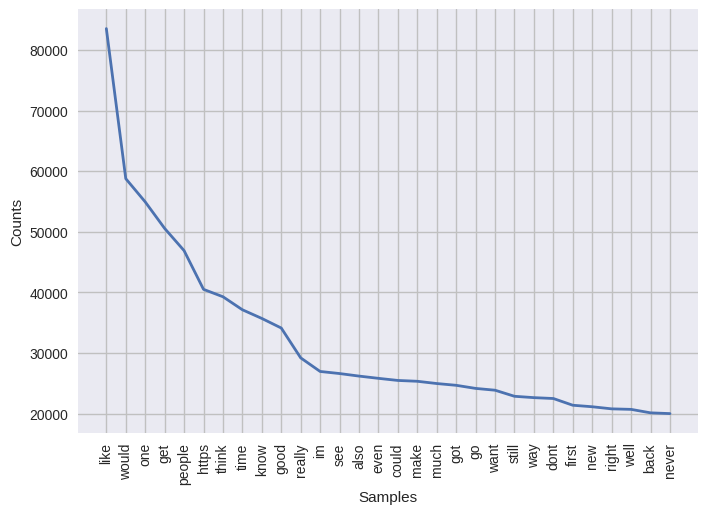

In [ ]:
# Frecuencia de palabras
list_tokens = [word for token in data_filter['tokens'] for word in token]
fdist = FreqDist(list_tokens)
top_words = fdist.most_common(10)
print("Palabras más frecuentes:")
for word, freq in top_words:
    print(f"{word}: {freq}")

# Visualización de frecuencia de palabras
fdist.plot(30, cumulative=False)
plt.show()

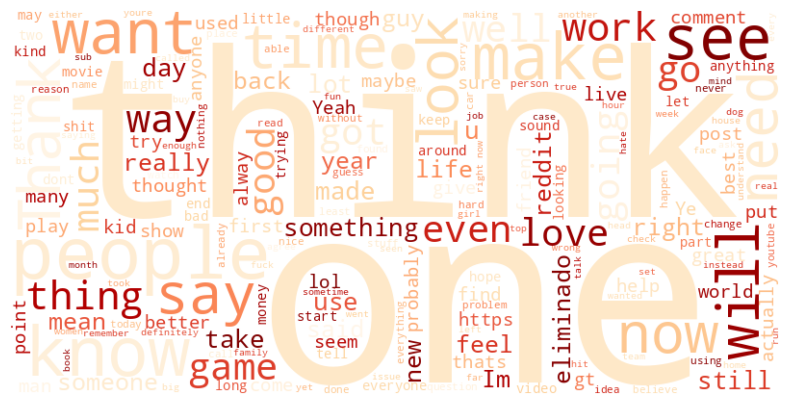

In [ ]:
from wordcloud import WordCloud
import math

data = list(data_filter["comment"].apply(str))
#for i in range(len(data)):
#    data[i] = data[i].replace("nan", "")

# Crear una nube de palabras
words = " ".join(data)
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap = "OrRd").generate(words)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Longitud de los textos
length_text = list()
for i in range(len(data)):
    length_text.append(len(data[i]))

In [ ]:
data_filter["length_text"] = length_text
data_filter

,comment,length_text
0,. He is just playing GTA 5 man,30
1,. kariyu will stare than play,29
2,. me in my dreams be like:,26
4,. Doom bc that game is soooo good i liked the ...,301
6,. hotline miami 2 please have a nice day my fr...,143
...,...,...
1102865,In need of a pussy eater.,26
1102866,Pussy eaters here's a gift.,28
1102867,Can this doll sit on your face?.,33
1102868,Born to have your dick in me .,31


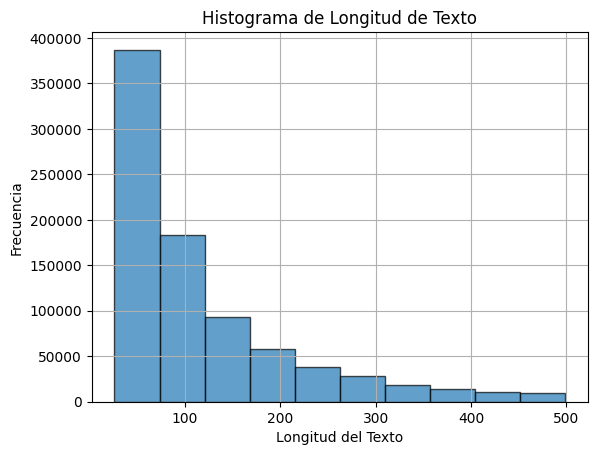

In [ ]:
# Crear un histograma de las longitudes de comentarios
plt.hist(data_filter["length_text"], edgecolor='k', alpha=0.7)
plt.title('Histograma de Longitud de Texto')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.show()

In [ ]:
num_tokens_ = data_filter["num_tokens"].reset_index()
num_tokens_ = num_tokens_["num_tokens"]
num_tokens_

0          4
1          3
2          2
3         30
4         11
          ..
839251     3
839252     3
839253     3
839254     2
839255     3
Name: num_tokens, Length: 839256, dtype: int64

In [ ]:
# Crear un histograma de las longitudes
#plt.hist(num_tokens_, edgecolor='k', alpha=0.7)
#plt.title('Histograma de número de tokens')
#plt.xlabel('Número de tokens')
#plt.ylabel('Frecuencia')
#plt.grid(True)

#plt.show()

In [ ]:
comentario = data_filter["comment"].reset_index()
comentario = comentario["comment"]
comentario

0                            . He is just playing GTA 5 man
1                             . kariyu will stare than play
2                                . me in my dreams be like:
3         . Doom bc that game is soooo good i liked the ...
4         . hotline miami 2 please have a nice day my fr...
                                ...                        
839251                           In need of a pussy eater. 
839252                         Pussy eaters here's a gift. 
839253                    Can this doll sit on your face?. 
839254                      Born to have your dick in me . 
839255                     Here's a gift for pussy eaters. 
Name: comment, Length: 839256, dtype: object

In [ ]:
sia = SentimentIntensityAnalyzer()
sentimiento = list()
for i in range(len(comentario)):
    sentimiento.append(sia.polarity_scores(comentario[i]))

sentimiento

[{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.2023},
 {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.34},
 {'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.6369},
 {'neg': 0.14, 'neu': 0.502, 'pos': 0.357, 'compound': 0.9286},
 {'neg': 0.0, 'neu': 0.535, 'pos': 0.465, 'compound': 0.8834},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.057, 'neu': 0.715, 'pos': 0.228, 'compound': 0.7513},
 {'neg': 0.0, 'neu': 0.883, 'pos': 0.117, 'compound': 0.5719},
 {'neg': 0.086, 'neu': 0.827, 'pos': 0.086, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.25},
 {'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'compound': 0.3182},
 {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.3818},
 {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.4215},
 {'neg': 0.209, 'neu': 0.723, 'pos': 0.068, 'compound': -0.6486},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0

In [ ]:
sentimiento_df = pd.DataFrame(sentimiento)
sentimiento_df

In [ ]:
user_data_df_idx = pd.concat([data_filter.reset_index(drop=True), sentimiento_df.reset_index(drop=True)], axis=1)
user_data_df_idx

In [ ]:
user_data_df_idx["date"] = filtered_data["date"].values
user_data_df_idx

In [ ]:
def determinar_periodo(fecha):
    hora = fecha.hour
    if 6 <= hora < 12:
        return "Mañana"
    elif 12 <= hora < 18:
        return "Día"
    elif 18 <= hora < 24:
        return "Noche"
    else:
        return "Madrugada"

user_data_df_idx['date'] = pd.to_datetime(user_data_df_idx['date'])
user_data_df_idx['periodo'] = user_data_df_idx['date'].apply(determinar_periodo)
#user_data_df_idx

In [ ]:
pattern = r'\b[A-Z]+\b'  # Coincide con palabras en mayúsculas.

user_data_df_idx['uppercase_words'] = user_data_df_idx['comment'].str.findall(pattern)
user_data_df_idx['count_uppercase_words'] = user_data_df_idx['uppercase_words'].apply(len)
#user_data_df_idx

In [ ]:
import re
# Pronombres en primera persona en inglés.
first_person_pronouns = ["I", "me", "my", "mine", "myself"]

def count_first_person_pronouns(comment):
    pattern = r'\b(?:' + '|'.join(first_person_pronouns) + r')\b'
    return len(re.findall(pattern, comment, flags=re.IGNORECASE))

user_data_df_idx['first_person_pronoun_count'] = user_data_df_idx['comment'].apply(count_first_person_pronouns)
#user_data_df_idx

In [ ]:
#user_data_df_idx.to_csv('/content/drive/MyDrive/user_data_df_idx.csv', index=False)

In [ ]:
user_data_df_idx = pd.read_csv('/content/drive/MyDrive/user_data_df_idx.csv')
user_data_df_idx

,comment,tokens,num_tokens,length_text,neg,neu,pos,compound,date,periodo,uppercase_words,count_uppercase_words,first_person_pronoun_count
0,. He is just playing GTA 5 man,"['playing', 'gta', '5', 'man']",4,30,0.000,0.735,0.265,0.2023,2021-08-25 13:03:25,Día,['GTA'],1,0
1,. kariyu will stare than play,"['kariyu', 'stare', 'play']",3,29,0.000,0.625,0.375,0.3400,2021-08-26 12:44:29,Día,[],0,0
2,. me in my dreams be like:,"['dreams', 'like']",2,26,0.000,0.435,0.565,0.6369,2021-08-26 12:45:56,Día,[],0,2
3,. Doom bc that game is soooo good i liked the ...,"['doom', 'bc', 'game', 'soooo', 'good', 'liked...",30,301,0.140,0.502,0.357,0.9286,2021-08-29 18:38:24,Noche,['I'],1,4
4,. hotline miami 2 please have a nice day my fr...,"['hotline', 'miami', '2', 'please', 'nice', 'd...",11,143,0.000,0.535,0.465,0.8834,2021-09-26 16:55:20,Día,[],0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839251,In need of a pussy eater.,"['need', 'pussy', 'eater']",3,26,0.000,1.000,0.000,0.0000,2022-10-24 19:32:14,Noche,[],0,0
839252,Pussy eaters here's a gift.,"['pussy', 'eaters', 'gift']",3,28,0.000,0.508,0.492,0.4404,2022-10-24 19:34:52,Noche,[],0,0
839253,Can this doll sit on your face?.,"['doll', 'sit', 'face']",3,33,0.000,1.000,0.000,0.0000,2022-10-24 19:43:31,Noche,[],0,0
839254,Born to have your dick in me .,"['born', 'dick']",2,31,0.355,0.645,0.000,-0.5106,2022-10-24 19:45:16,Noche,[],0,1


In [ ]:
filtered_data

,user,date,title,text,comment,cat
0,6157,2021-08-25 13:03:25,NaN,He is just playing GTA 5 man,. He is just playing GTA 5 man,0
1,6157,2021-08-26 12:44:29,NaN,kariyu will stare than play,. kariyu will stare than play,0
2,6157,2021-08-26 12:45:56,NaN,me in my dreams be like:,. me in my dreams be like:,0
4,6157,2021-08-29 18:38:24,NaN,Doom bc that game is soooo good i liked the gu...,. Doom bc that game is soooo good i liked the ...,0
6,6157,2021-09-26 16:55:20,NaN,hotline miami 2 please have a nice day my frie...,. hotline miami 2 please have a nice day my fr...,0
...,...,...,...,...,...,...
1102865,3988,2022-10-24 19:32:14,In need of a pussy eater,NaN,In need of a pussy eater.,0
1102866,3988,2022-10-24 19:34:52,Pussy eaters here's a gift,NaN,Pussy eaters here's a gift.,0
1102867,3988,2022-10-24 19:43:31,Can this doll sit on your face?,NaN,Can this doll sit on your face?.,0
1102868,3988,2022-10-24 19:45:16,Born to have your dick in me,NaN,Born to have your dick in me .,0


In [ ]:
user_data_df_idx["user"] = filtered_data["user"].values
user_data_df_idx

,comment,tokens,num_tokens,length_text,neg,neu,pos,compound,date,periodo,uppercase_words,count_uppercase_words,first_person_pronoun_count,user
0,. He is just playing GTA 5 man,"['playing', 'gta', '5', 'man']",4,30,0.000,0.735,0.265,0.2023,2021-08-25 13:03:25,Día,['GTA'],1,0,6157
1,. kariyu will stare than play,"['kariyu', 'stare', 'play']",3,29,0.000,0.625,0.375,0.3400,2021-08-26 12:44:29,Día,[],0,0,6157
2,. me in my dreams be like:,"['dreams', 'like']",2,26,0.000,0.435,0.565,0.6369,2021-08-26 12:45:56,Día,[],0,2,6157
3,. Doom bc that game is soooo good i liked the ...,"['doom', 'bc', 'game', 'soooo', 'good', 'liked...",30,301,0.140,0.502,0.357,0.9286,2021-08-29 18:38:24,Noche,['I'],1,4,6157
4,. hotline miami 2 please have a nice day my fr...,"['hotline', 'miami', '2', 'please', 'nice', 'd...",11,143,0.000,0.535,0.465,0.8834,2021-09-26 16:55:20,Día,[],0,3,6157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839251,In need of a pussy eater.,"['need', 'pussy', 'eater']",3,26,0.000,1.000,0.000,0.0000,2022-10-24 19:32:14,Noche,[],0,0,3988
839252,Pussy eaters here's a gift.,"['pussy', 'eaters', 'gift']",3,28,0.000,0.508,0.492,0.4404,2022-10-24 19:34:52,Noche,[],0,0,3988
839253,Can this doll sit on your face?.,"['doll', 'sit', 'face']",3,33,0.000,1.000,0.000,0.0000,2022-10-24 19:43:31,Noche,[],0,0,3988
839254,Born to have your dick in me .,"['born', 'dick']",2,31,0.355,0.645,0.000,-0.5106,2022-10-24 19:45:16,Noche,[],0,1,3988


In [ ]:
user_data_df_idx["cat"] = filtered_data["cat"].values
user_data_df_idx

,comment,tokens,num_tokens,length_text,neg,neu,pos,compound,date,periodo,uppercase_words,count_uppercase_words,first_person_pronoun_count,user,cat
0,. He is just playing GTA 5 man,"['playing', 'gta', '5', 'man']",4,30,0.000,0.735,0.265,0.2023,2021-08-25 13:03:25,Día,['GTA'],1,0,6157,0
1,. kariyu will stare than play,"['kariyu', 'stare', 'play']",3,29,0.000,0.625,0.375,0.3400,2021-08-26 12:44:29,Día,[],0,0,6157,0
2,. me in my dreams be like:,"['dreams', 'like']",2,26,0.000,0.435,0.565,0.6369,2021-08-26 12:45:56,Día,[],0,2,6157,0
3,. Doom bc that game is soooo good i liked the ...,"['doom', 'bc', 'game', 'soooo', 'good', 'liked...",30,301,0.140,0.502,0.357,0.9286,2021-08-29 18:38:24,Noche,['I'],1,4,6157,0
4,. hotline miami 2 please have a nice day my fr...,"['hotline', 'miami', '2', 'please', 'nice', 'd...",11,143,0.000,0.535,0.465,0.8834,2021-09-26 16:55:20,Día,[],0,3,6157,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839251,In need of a pussy eater.,"['need', 'pussy', 'eater']",3,26,0.000,1.000,0.000,0.0000,2022-10-24 19:32:14,Noche,[],0,0,3988,0
839252,Pussy eaters here's a gift.,"['pussy', 'eaters', 'gift']",3,28,0.000,0.508,0.492,0.4404,2022-10-24 19:34:52,Noche,[],0,0,3988,0
839253,Can this doll sit on your face?.,"['doll', 'sit', 'face']",3,33,0.000,1.000,0.000,0.0000,2022-10-24 19:43:31,Noche,[],0,0,3988,0
839254,Born to have your dick in me .,"['born', 'dick']",2,31,0.355,0.645,0.000,-0.5106,2022-10-24 19:45:16,Noche,[],0,1,3988,0


In [ ]:
#user_data_df_idx_cat = user_data_df_idx.merge(filtered_data[["user","cat"]], on='user', how='outer')
user_data_df_idx_cat = user_data_df_idx

In [ ]:
user_data_df_idx_cat['periodo'] = user_data_df_idx_cat['periodo'].astype('category')
user_data_df_idx_cat['period_dia'] = user_data_df_idx_cat['periodo'].cat.codes
user_data_df_idx_cat

,comment,tokens,num_tokens,length_text,neg,neu,pos,compound,date,periodo,uppercase_words,count_uppercase_words,first_person_pronoun_count,user,cat,period_dia
0,. He is just playing GTA 5 man,"['playing', 'gta', '5', 'man']",4,30,0.000,0.735,0.265,0.2023,2021-08-25 13:03:25,Día,['GTA'],1,0,6157,0,0
1,. kariyu will stare than play,"['kariyu', 'stare', 'play']",3,29,0.000,0.625,0.375,0.3400,2021-08-26 12:44:29,Día,[],0,0,6157,0,0
2,. me in my dreams be like:,"['dreams', 'like']",2,26,0.000,0.435,0.565,0.6369,2021-08-26 12:45:56,Día,[],0,2,6157,0,0
3,. Doom bc that game is soooo good i liked the ...,"['doom', 'bc', 'game', 'soooo', 'good', 'liked...",30,301,0.140,0.502,0.357,0.9286,2021-08-29 18:38:24,Noche,['I'],1,4,6157,0,3
4,. hotline miami 2 please have a nice day my fr...,"['hotline', 'miami', '2', 'please', 'nice', 'd...",11,143,0.000,0.535,0.465,0.8834,2021-09-26 16:55:20,Día,[],0,3,6157,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839251,In need of a pussy eater.,"['need', 'pussy', 'eater']",3,26,0.000,1.000,0.000,0.0000,2022-10-24 19:32:14,Noche,[],0,0,3988,0,3
839252,Pussy eaters here's a gift.,"['pussy', 'eaters', 'gift']",3,28,0.000,0.508,0.492,0.4404,2022-10-24 19:34:52,Noche,[],0,0,3988,0,3
839253,Can this doll sit on your face?.,"['doll', 'sit', 'face']",3,33,0.000,1.000,0.000,0.0000,2022-10-24 19:43:31,Noche,[],0,0,3988,0,3
839254,Born to have your dick in me .,"['born', 'dick']",2,31,0.355,0.645,0.000,-0.5106,2022-10-24 19:45:16,Noche,[],0,1,3988,0,3


In [ ]:
#user_data_df_idx_cat.to_csv('/content/drive/MyDrive/user_data_df_idx_cat.csv', index=False)

In [ ]:
df_noludo = user_data_df_idx_cat[user_data_df_idx_cat['cat'] == "0"]
df_ludo = user_data_df_idx_cat[user_data_df_idx_cat['cat'] == "1"]

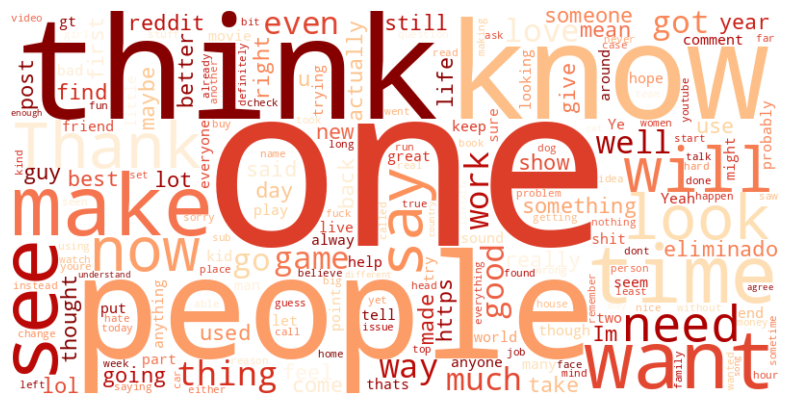

In [ ]:
# Crear una nube de palabras
words = " ".join(df_noludo["comment"])
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap = "OrRd").generate(words)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

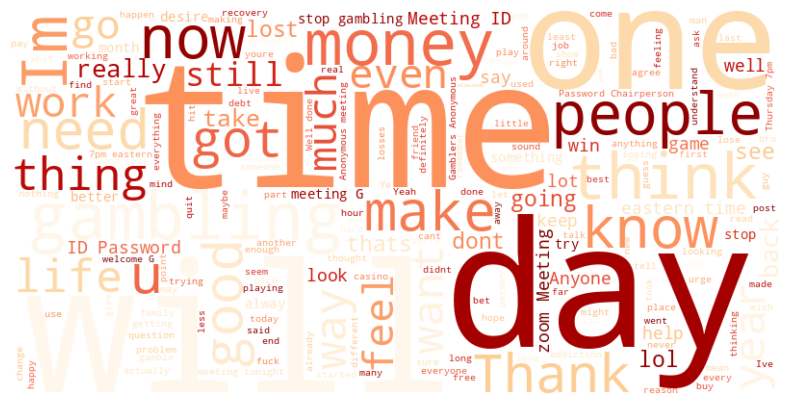

In [ ]:
# Crear una nube de palabras
words = " ".join(df_ludo["comment"])
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap = "OrRd").generate(words)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
caract = ['num_tokens', 'length_text',
          'user','neg','neu','pos','compound','count_uppercase_words',
          'first_person_pronoun_count','period_dia']

# Crea un nuevo DataFrame con las columnas seleccionadas
features_1 = user_data_df_idx_cat[caract]
y = user_data_df_idx_cat["cat"].astype('int')
features_1.set_index("user")

,num_tokens,length_text,neg,neu,pos,compound,count_uppercase_words,first_person_pronoun_count,period_dia
user,,,,,,,,,
6157,4,30,0.000,0.735,0.265,0.2023,1,0,0
6157,3,29,0.000,0.625,0.375,0.3400,0,0,0
6157,2,26,0.000,0.435,0.565,0.6369,0,2,0
6157,30,301,0.140,0.502,0.357,0.9286,1,4,3
6157,11,143,0.000,0.535,0.465,0.8834,0,3,0
...,...,...,...,...,...,...,...,...,...
3988,3,26,0.000,1.000,0.000,0.0000,0,0,3
3988,3,28,0.000,0.508,0.492,0.4404,0,0,3
3988,3,33,0.000,1.000,0.000,0.0000,0,0,3


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_numt = StandardScaler()
x1 = scaler_numt.fit_transform(features_1["num_tokens"].values.reshape(-1, 1))
scaler_lent = StandardScaler()
x2 = scaler_numt.fit_transform(features_1["length_text"].values.reshape(-1, 1))

In [ ]:
features_1.loc[:,"num_tokens"] = x1
features_1.loc[:,"length_text"] = x2

<ipython-input-51-6ee714a5658f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_1.loc[:,"num_tokens"] = x1
<ipython-input-51-6ee714a5658f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_1.loc[:,"length_text"] = x2


In [ ]:
#import seaborn as sns
#muestra = features_1.sample(n=1000)

#sns.pairplot(muestra)

In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
839251    0
839252    0
839253    0
839254    0
839255    0
Name: cat, Length: 839256, dtype: int64

In [ ]:
conteo_categorias = user_data_df_idx_cat["cat"].value_counts()
print(conteo_categorias)

porcentaje = (conteo_categorias / len(user_data_df_idx_cat)) * 100
print(porcentaje)

0    813209
1     26047
Name: cat, dtype: int64
0    96.896418
1     3.103582
Name: cat, dtype: float64


In [ ]:
#from sklearn.decomposition import PCA

# Ajusta un modelo de PCA
#pca = PCA()
#pca.fit(features_1)

# Obtiene las varianzas explicadas por cada componente principal
#explained_var_ratio = pca.explained_variance_ratio_
#print(explained_var_ratio)
# Calcula la varianza acumulativa explicada
#cumulative_var_ratio = np.cumsum(explained_var_ratio)

# Crea el gráfico de codo
#plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o', linestyle='--')
#plt.xlabel('Número de Componentes Principales')
#plt.ylabel('Varianza Acumulativa Explicada')
#plt.title('Gráfico de Codo de PCA')
#plt.grid(True)
#plt.show()

In [ ]:
#X_pca = PCA(n_components = 4)
#X_pca = X_pca.fit_transform(features_1)

In [ ]:

#import matplotlib
#cmap = matplotlib.colormaps.get_cmap("viridis")

# Grafica los dos primeros componentes principales
#plt.figure(figsize=(8, 6))
#plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
#plt.xlabel('Primer Componente Principal')
#plt.ylabel('Segundo Componente Principal')
#plt.title('Gráfico de los Dos Primeros Componentes Principales de PCA')
#plt.grid(True)
#plt.show()


In [ ]:
#sample_ = features_1.sample(n=1000)

In [ ]:
#from sklearn.decomposition import KernelPCA

#kpca = KernelPCA(kernel='rbf')  # Puedes seleccionar el kernel deseado
#X_kpca = kpca.fit(sample_.T)

#explained_var_ratio = kpca.eigenvalues_ / np.sum(kpca.eigenvalues_)
#cumulative_var_ratio = np.cumsum(explained_var_ratio)

# Crea el gráfico de codo
#plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o', linestyle='--')
#plt.xlabel('Número de Componentes Principales')
#plt.ylabel('Varianza Acumulativa Explicada')
#plt.title('Gráfico de Codo de Kernel PCA')
#plt.grid(True)
#plt.show()

In [ ]:

# Grafica los dos primeros componentes principales
#X_pca = KernelPCA(n_components = 6, kernel='cosine')
#X_pca = X_pca.fit_transform(sample_)

#plt.figure(figsize=(8, 6))
#plt.scatter(X_pca[:, 0], X_pca[:, 1])
#plt.xlabel('Primer Componente Principal')
#plt.ylabel('Segundo Componente Principal')
#plt.title('Gráfico de los Dos Primeros Componentes Principales de PCA')
#plt.grid(True)
#plt.show()


## Carga de datos

In [ ]:
!pip install tqdm boto3 requests regex sentencepiece sacremoses transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 10.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
user_data_df_idx_cat = pd.read_csv('/content/drive/MyDrive/user_data_df_idx_cat.csv')
user_data_df_idx_cat

,comment,tokens,num_tokens,length_text,neg,neu,pos,compound,date,periodo,uppercase_words,count_uppercase_words,first_person_pronoun_count,user,cat,period_dia
0,. He is just playing GTA 5 man,"['playing', 'gta', '5', 'man']",4,30,0.000,0.735,0.265,0.2023,2021-08-25 13:03:25,Día,['GTA'],1,0,6157,0,0
1,. kariyu will stare than play,"['kariyu', 'stare', 'play']",3,29,0.000,0.625,0.375,0.3400,2021-08-26 12:44:29,Día,[],0,0,6157,0,0
2,. me in my dreams be like:,"['dreams', 'like']",2,26,0.000,0.435,0.565,0.6369,2021-08-26 12:45:56,Día,[],0,2,6157,0,0
3,. Doom bc that game is soooo good i liked the ...,"['doom', 'bc', 'game', 'soooo', 'good', 'liked...",30,301,0.140,0.502,0.357,0.9286,2021-08-29 18:38:24,Noche,['I'],1,4,6157,0,3
4,. hotline miami 2 please have a nice day my fr...,"['hotline', 'miami', '2', 'please', 'nice', 'd...",11,143,0.000,0.535,0.465,0.8834,2021-09-26 16:55:20,Día,[],0,3,6157,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839251,In need of a pussy eater.,"['need', 'pussy', 'eater']",3,26,0.000,1.000,0.000,0.0000,2022-10-24 19:32:14,Noche,[],0,0,3988,0,3
839252,Pussy eaters here's a gift.,"['pussy', 'eaters', 'gift']",3,28,0.000,0.508,0.492,0.4404,2022-10-24 19:34:52,Noche,[],0,0,3988,0,3
839253,Can this doll sit on your face?.,"['doll', 'sit', 'face']",3,33,0.000,1.000,0.000,0.0000,2022-10-24 19:43:31,Noche,[],0,0,3988,0,3
839254,Born to have your dick in me .,"['born', 'dick']",2,31,0.355,0.645,0.000,-0.5106,2022-10-24 19:45:16,Noche,[],0,1,3988,0,3


In [ ]:
import torch
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
MAX_LEN = 128
TRAIN_BATCH_SIZE = 32
VALID_BATCH_SIZE = 32
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-cased')

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

## Balanceo de categorias

In [ ]:
df_noludo = user_data_df_idx_cat[user_data_df_idx_cat['cat'] == 0]
df_ludo = user_data_df_idx_cat[user_data_df_idx_cat['cat'] == 1]

In [ ]:
print(df_noludo.shape)
print(df_ludo.shape)

(813209, 16)
(26047, 16)


In [ ]:
df_ludo_sample = df_ludo
df_noludo_sample = df_noludo.sample(df_ludo.shape[0])

In [ ]:
df_sample = pd.concat([df_ludo_sample,df_noludo_sample])
df_sample

,comment,tokens,num_tokens,length_text,neg,neu,pos,compound,date,periodo,uppercase_words,count_uppercase_words,first_person_pronoun_count,user,cat,period_dia
679,". Give up your money man. Find someone, make ...","['give', 'money', 'man', 'find', 'someone', 'm...",30,354,0.000,0.903,0.097,0.7184,2021-10-26 06:57:03,Mañana,"['I', 'I', 'I']",3,5,9270,1,2
680,. Lol white American mutt. Just asking becaus...,"['lol', 'white', 'american', 'mutt', 'asking',...",41,471,0.029,0.789,0.182,0.9178,2021-05-26 04:06:00,Madrugada,"['I', 'I', 'I', 'I', 'I', 'I']",6,11,9270,1,1
681,". Also you sound Chinese, are you Chinese","['also', 'sound', 'chinese', 'chinese']",4,43,0.000,1.000,0.000,0.0000,2021-05-26 04:02:15,Madrugada,[],0,0,9270,1,1
682,". Oh and yeah, I'm forsure the black sheep of...","['oh', 'yeah', 'forsure', 'black', 'sheep', 'f...",27,358,0.052,0.824,0.124,0.7371,2021-05-26 03:58:21,Madrugada,"['I', 'I']",2,2,9270,1,1
683,. How deep is your debt? And yeah fuck the gu...,"['deep', 'debt', 'yeah', 'fuck', 'guys', 'tryi...",17,166,0.133,0.576,0.290,0.7964,2021-05-26 02:56:03,Madrugada,[],0,0,9270,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365947,. Revolver barrel to the back of your head,"['revolver', 'barrel', 'back', 'head']",4,42,0.000,1.000,0.000,0.0000,2022-08-01 20:04:55,Noche,[],0,0,695,0,3
561586,. She Works Hard for the Money,"['works', 'hard', 'money']",3,30,0.219,0.781,0.000,-0.1027,2022-09-14 06:28:09,Mañana,[],0,0,7754,0,2
481367,Gotta get hotdogs for a camping trip. Whats th...,"['got', 'ta', 'get', 'hotdogs', 'camping', 'tr...",19,136,0.170,0.680,0.150,0.2869,2021-09-10 19:12:26,Noche,[],0,0,6923,0,3
261221,My favorite WWE finish of 2017 so far..,"['favorite', 'wwe', 'finish', '2017', 'far']",5,40,0.000,0.700,0.300,0.4588,2017-07-07 20:45:54,Noche,['WWE'],1,1,8537,0,3


In [ ]:
data = df_sample[["comment","cat"]]
data['cat'] = data['cat'].apply(lambda x: 'No ludopatía' if x == 0 else 'Ludopatía')

<ipython-input-205-fd98a72fcb83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cat'] = data['cat'].apply(lambda x: 'No ludopatía' if x == 0 else 'Ludopatía')


In [ ]:
data['comment'] = data['comment'].str.lstrip('. ')

<ipython-input-206-fa436df02252>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['comment'] = data['comment'].str.lstrip('. ')


In [ ]:
data

,comment,cat
679,"Give up your money man. Find someone, make a f...",Ludopatía
680,Lol white American mutt. Just asking because I...,Ludopatía
681,"Also you sound Chinese, are you Chinese",Ludopatía
682,"Oh and yeah, I'm forsure the black sheep of th...",Ludopatía
683,How deep is your debt? And yeah fuck the guys ...,Ludopatía
...,...,...
365947,Revolver barrel to the back of your head,No ludopatía
561586,She Works Hard for the Money,No ludopatía
481367,Gotta get hotdogs for a camping trip. Whats th...,No ludopatía
261221,My favorite WWE finish of 2017 so far..,No ludopatía


In [ ]:
data.isnull().any()

comment    False
cat        False
dtype: bool

In [ ]:
labels_to_ids = {k: v for v, k in enumerate(data.cat.unique())}
labels_to_ids

{'Ludopatía': 0, 'No ludopatía': 1}

In [ ]:
ids_to_labels = {v: k for v, k in enumerate(data.cat.unique())}
ids_to_labels

{0: 'Ludopatía', 1: 'No ludopatía'}

In [ ]:
import numpy as np
import math
class dataset(Dataset):
  def __init__(self, dataframe, tokenizer, max_len):
        self.len = len(dataframe)
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len

  def __getitem__(self, index):
        # step 1: get the sentence and word labels
        sentence = self.data.comment[index]
        word_labels = self.data.cat
        # step 2: use tokenizer to encode sentence (includes padding/truncation up to max length)
        encoding = self.tokenizer(sentence,
                             return_offsets_mapping=True,
                             padding='max_length',
                             truncation=True,
                             max_length=self.max_len)

        # step 3: create token labels only for first word pieces of each tokenized word
        labels = [labels_to_ids[etiqueta] for etiqueta in word_labels]
        encoded_labels = labels[index]

        # step 4: turn everything into PyTorch tensors
        item = {key: torch.as_tensor(val) for key, val in encoding.items()}
        item['labels'] = torch.as_tensor(encoded_labels).reshape(1)

        return item

  def __len__(self):
        return self.len

In [ ]:
train_size = 0.8
train_dataset = data.sample(frac=train_size,random_state=200)
test_dataset = data.drop(train_dataset.index).reset_index(drop=True)
train_dataset = train_dataset.reset_index(drop=True)

print("Full Dataset: {}".format(data.shape))
print("Train Dataset: {}".format(train_dataset.shape))
print("Test Dataset: {}".format(test_dataset.shape))

Full Dataset: (52094, 2)
Train Dataset: (41675, 2)
Test Dataset: (10419, 2)


In [ ]:
training_set = dataset(train_dataset, tokenizer, MAX_LEN)
testing_set = dataset(test_dataset, tokenizer, MAX_LEN)

In [ ]:
print(train_dataset.iloc[20009])
print(train_dataset.iloc[20008])

comment    This is gambling. Since I am a gambling addict...
cat                                                Ludopatía
Name: 20009, dtype: object
comment    Money...more important than people's lives?!?!...
cat                                             No ludopatía
Name: 20008, dtype: object


In [ ]:
training_set[20009]["labels"]

tensor([0])

In [ ]:
training_set.data.head(5)

,comment,cat
0,You can often find their arguments and explana...,Ludopatía
1,"It wasnt, actually! Portland, OR.",No ludopatía
2,Looking for a short story in an edition of Bes...,No ludopatía
3,"It was an excellent, heart wrenching film I th...",No ludopatía
4,Why does this creep me out so bad?,No ludopatía


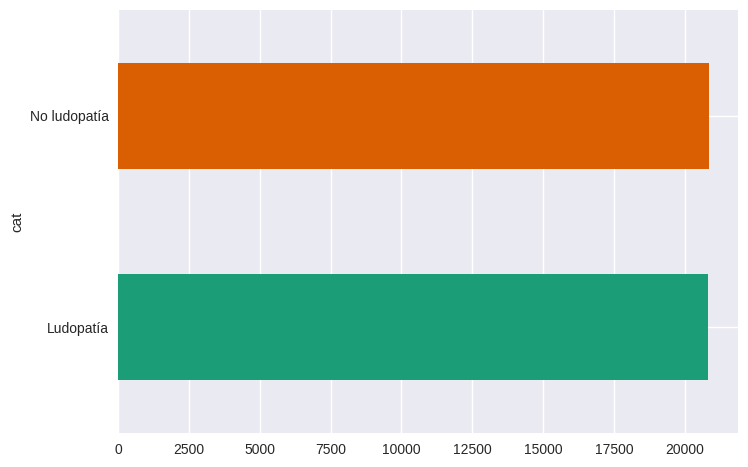

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
training_set.data.groupby('cat').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
training_set[0]["input_ids"].reshape(-1)

tensor([  101,  1192,  1169,  1510,  1525,  1147,  9989,  1105, 19940,  1112,
         1106,  1725,  1152,  4751,  1222,  1380,   119,  1252,  1157,  3417,
         1136,  1112,  2213,  1112,  1234,  1328,  1106,  2059,   117,  1177,
         1157,  5794,   119,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0])

In [ ]:
print(train_dataset.iloc[20008]["comment"])

Money...more important than people's lives?!?!?! That would never happen!


In [ ]:
for token, label in zip(tokenizer.convert_ids_to_tokens(training_set[20008]["input_ids"].reshape(-1)), training_set[20008]["labels"]):
  print('{0:10}  {1}'.format(token, label))

[CLS]       1


In [ ]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 2
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 2
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [ ]:
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-cased', num_labels=len(labels_to_ids))
model.to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
import torch.nn as nn

# Freeze model weights
for param in model.parameters():
    param.requires_grad = False

print(model.classifier)
print(model.dropout)

Linear(in_features=768, out_features=2, bias=True)
Dropout(p=0.2, inplace=False)


In [ ]:
model.classifier = nn.Sequential(
            nn.Dropout(p=0.5, inplace = False),
            nn.Linear(model.pre_classifier.in_features,256),
            nn.Tanh(),
            nn.Dropout(p=0.3, inplace = False),
            nn.Linear(256,32),
            nn.Tanh(),
            nn.Linear(32,16),
            nn.Linear(16,2),
            nn.LogSoftmax(dim=1),
            )
model.dropout = nn.Sequential(
            nn.Dropout(p=0.2),
            )

In [ ]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
# Find total parameters and trainable parameters
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

65,987,154 total parameters.
205,650 training parameters.


In [ ]:
inputs = training_set[2]
inputs["input_ids"].unsqueeze(0).shape

torch.Size([1, 128])

In [ ]:
model.to(device)
inputs = training_set[0]
input_ids = inputs["input_ids"].unsqueeze(0)
attention_mask = inputs["attention_mask"].unsqueeze(0)
labels = inputs["labels"]

input_ids = input_ids.to(device)
attention_mask = attention_mask.to(device)
labels = labels.to(device)

outputs = model(input_ids, attention_mask = attention_mask, labels=labels)
initial_loss = outputs[0]
initial_loss.item()

0.5029236674308777

In [ ]:
outputs

SequenceClassifierOutput(loss=tensor(0.5029, device='cuda:0', grad_fn=<NllLossBackward0>), logits=tensor([[-0.5029, -0.9283]], device='cuda:0', grad_fn=<LogSoftmaxBackward0>), hidden_states=None, attentions=None)

In [ ]:
tr_logits = outputs.logits
tr_logits.shape

torch.Size([1, 2])

## Entrenamiento

In [ ]:
def evaluate(model,data_loader):
    correct = 0
    with torch.no_grad():
            for batch in data_loader:

                ids = batch['input_ids'].to(device, dtype = torch.long)
                mask = batch['attention_mask'].to(device, dtype = torch.long)
                labels = batch['labels'].to(device, dtype = torch.long)

                model.eval()

                outputs = model(input_ids=ids, attention_mask=mask, labels=labels)
                correct += (labels.view(-1) == torch.argmax(outputs.logits, 1)).float().sum()
                del([ids,mask,labels])

    print('Val Accuracy: {}/{} ({:.3f}%)\n'.format(correct, len(data_loader.dataset), 100. * correct / len(data_loader.dataset)))
    return correct/len(data_loader.dataset)


In [ ]:
#Define epochs, optimizer and loss function
num_epochs = 10
loss_function = nn.NLLLoss() #nn.NLLLoss()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr= 0.0001)
max = 0
# Train the model
total_step = len(training_loader)
print("Total Batches:",total_step)

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for i, batch in enumerate(training_loader):

        ids = batch['input_ids'].to(device, dtype = torch.long)
        mask = batch['attention_mask'].to(device, dtype = torch.long)
        labels = batch['labels'].to(device, dtype = torch.long)

        outputs = model(input_ids=ids, attention_mask=mask, labels=labels)

        # Forward pass
        loss = loss_function(outputs.logits, labels.view(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()* labels.size(0)

        progreso = (i+1) / total_step * 100
        print(f"\rProgreso: {progreso:.2f}%", end="", flush=True)

    #After each epoch print Train loss and validation loss + accuracy
    print ('\rEpoch [{}/{}], Training Loss: {:.4f}' .format(epoch+1, num_epochs, loss.item()))

    #After each epoch evaluate model
    val_acc = evaluate(model, testing_loader)

    if val_acc.item() > max:
      max = val_acc.item()
      tokenizer.save_pretrained("/content/drive/MyDrive/LudoBERT/Best/")
      torch.save(model.state_dict(), "/content/drive/MyDrive/LudoBERT/Best/model.pt")
      model.save_pretrained("/content/drive/MyDrive/LudoBERT/Best/")
      print('Files saved')

Total Batches: 1303
Epoch [1/10], Training Loss: 0.5741
Val Accuracy: 7169.0/10419 (68.807%)

Files saved
Epoch [2/10], Training Loss: 0.7702
Val Accuracy: 7207.0/10419 (69.172%)

Files saved
Epoch [3/10], Training Loss: 0.5528
Val Accuracy: 7218.0/10419 (69.277%)

Files saved
Epoch [4/10], Training Loss: 0.7766
Val Accuracy: 7172.0/10419 (68.836%)

Epoch [5/10], Training Loss: 0.6275
Val Accuracy: 7075.0/10419 (67.905%)

Epoch [6/10], Training Loss: 0.7489
Val Accuracy: 7169.0/10419 (68.807%)

Epoch [7/10], Training Loss: 0.6203
Val Accuracy: 7173.0/10419 (68.845%)

Epoch [8/10], Training Loss: 0.5416
Val Accuracy: 6875.0/10419 (65.985%)

Epoch [9/10], Training Loss: 0.3913
Val Accuracy: 7093.0/10419 (68.078%)

Epoch [10/10], Training Loss: 0.6181
Val Accuracy: 7202.0/10419 (69.124%)



## Carga del modelo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import math
from torch.utils.data import Dataset, DataLoader

class dataset(Dataset):
  def __init__(self, dataframe, tokenizer, max_len):
        self.len = len(dataframe)
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len

  def __getitem__(self, index):
        sentence = self.data.comment[index]
        word_labels = self.data.cat
        encoding = self.tokenizer(sentence,
                             return_offsets_mapping=True,
                             padding='max_length',
                             truncation=True,
                             max_length=self.max_len)

        labels = [labels_to_ids[etiqueta] for etiqueta in word_labels]
        encoded_labels = labels[index]

        item = {key: torch.as_tensor(val) for key, val in encoding.items()}
        item['labels'] = torch.as_tensor(encoded_labels).reshape(1)

        return item

  def __len__(self):
        return self.len

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/data_ludo_balanced.csv')
labels_to_ids = {k: v for v, k in enumerate(data.cat.unique())}
print(labels_to_ids)
ids_to_labels = {v: k for v, k in enumerate(data.cat.unique())}
print(ids_to_labels)

def valid(model, testing_loader):
    model.eval()
    eval_preds, eval_labels = [], []

    with torch.no_grad():
        for batch in testing_loader:

            ids = batch['input_ids'].to(device, dtype = torch.long)
            mask = batch['attention_mask'].to(device, dtype = torch.long)
            labels = batch['labels'].to(device, dtype = torch.long)

            outputs = model(input_ids=ids, attention_mask=mask, labels=labels)

            # compute evaluation accuracy
            flattened_targets = labels.view(-1)
            active_logits = outputs[1].view(-1, model.num_labels)
            flattened_predictions = torch.argmax(active_logits, axis=1)

            eval_labels.extend(flattened_targets)
            eval_preds.extend(flattened_predictions)

            #tmp_eval_accuracy = accuracy_score(flattened_targets.cpu().numpy(),flattened_predictions.cpu().numpy())
            #eval_accuracy += tmp_eval_accuracy

    labels = [ids_to_labels[id.item()] for id in eval_labels]
    predictions = [ids_to_labels[id.item()] for id in eval_preds]

    return labels, predictions

{'Ludopatía': 0, 'No ludopatía': 1}
{0: 'Ludopatía', 1: 'No ludopatía'}


In [ ]:
# Cargar el modelo
import torch
from torch import cuda
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DistilBertForSequenceClassification
import torch.nn as nn


model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-cased', num_labels=len(labels_to_ids))
weights = torch.load( "/content/drive/MyDrive/LudoBERT/Best/model.pt")
model.classifier = nn.Sequential(
            nn.Dropout(p=0.5, inplace = False),
            nn.Linear(model.pre_classifier.in_features,256),
            nn.Tanh(),
            nn.Dropout(p=0.3, inplace = False),
            nn.Linear(256,32),
            nn.Tanh(),
            nn.Linear(32,16),
            nn.Linear(16,2),
            nn.LogSoftmax(dim=1),
            )
model.dropout = nn.Sequential(
            nn.Dropout(p=0.2),
            )
model.load_state_dict(weights)
model.eval()


tokenizer = AutoTokenizer.from_pretrained('/content/drive/MyDrive/LudoBERT/Best/', local_files_only=True)

print('Modelo cargado exitosamente.')

device = 'cuda' if cuda.is_available() else 'cpu'
model.to(device)
print(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Modelo cargado exitosamente.
cuda


In [ ]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
train_dataset = data.sample(frac=0.8,random_state=200)
test_dataset = data.drop(train_dataset.index).reset_index(drop=True)
testing_set = dataset(test_dataset, tokenizer, 128)

test_params = {'batch_size': 32,
                'shuffle': True,
                'num_workers': 2
                }
testing_loader = DataLoader(testing_set, **test_params)

In [ ]:
#true_labels, predictions = valid(model, testing_loader)

## Métricas de rendimiento

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predictions))

              precision    recall  f1-score   support

   Ludopatía       0.76      0.55      0.64      5222
No ludopatía       0.65      0.82      0.73      5197

    accuracy                           0.69     10419
   macro avg       0.70      0.69      0.68     10419
weighted avg       0.70      0.69      0.68     10419



## Predicción

In [ ]:
MAX_LEN = 128
NUM_LABELS = 2

def prediction_model(sentence, model, tokenizer):
  inputs = tokenizer(sentence,
                      #is_pretokenized=True,
                      return_offsets_mapping=True,
                      padding='max_length',
                      truncation=True,
                      max_length=MAX_LEN,
                      return_tensors="pt")

  # move to gpu
  ids = inputs["input_ids"].to(device)
  mask = inputs["attention_mask"].to(device)

  # forward pass
  outputs = model(ids, attention_mask=mask)
  logits = outputs.logits

  active_logits = logits.view(-1, NUM_LABELS) # shape (batch_size * seq_len, num_labels)
  flattened_predictions = torch.argmax(active_logits, axis=1) # shape (batch_size*seq_len,) - predictions at the token level
  tokens = tokenizer.convert_ids_to_tokens(ids.squeeze().tolist())
  token_predictions = [ids_to_labels[i] for i in flattened_predictions.cpu().numpy()]
  prediction = token_predictions

  return prediction

In [ ]:
sentence = "I like gambling and SPEND MONEY"
sentence = "i like pokemons"

prediction = prediction_model(sentence, model, tokenizer)
print(sentence)
print(prediction)

i like pokemons
['No ludopatía']


In [ ]:
#Fuente: https://github.com/text-machine-lab/dark-secrets-of-BERT/blob/master/visualize_attention.ipynb
#!pip install textacy

In [ ]:
#import textacy
#import sys
#import random
#sys.path.append("/content/drive/MyDrive/")
#import visualize_attention as va

In [ ]:
#model_finetuned = model
#model_base = va.restore_model()

In [ ]:
#rand_example = list(data.comment.sample(2))
#print(rand_example)
#ludo = ["Give up your money man. Find someone, make a friend if you have to, and give them the lock to that money to safeguard it from your self. This is the only thing that worked for me. Guess what, I still have the urge to gamble, but I also don't have the urge to jump off a cliff every other week. I gave up just a bit of my pride to get back everything.",
#        "Lol white American mutt. Just asking because I saw the name and I know a lot of Chinese have gambling issues. Look man, your family is definitely dissapointed, I'm sure you are as well, but they mean well and are doing that to ""correct"" you. You know what my family did? They told me it's no big deal and that maybe I should try again, but this time be ""smarter"". Trust me, Id rather have your family talking to me than mine lol, maybe I wouldn't be where I am today",
#        "Oh and yeah, I'm forsure the black sheep of the family. Squandering as much work and effort as I have will do that, but that's life mane. Use it as motivation to succeed in life, and don't make the dollar almighty. It's just an illusion. Money is important,sure, but it in and of itself isn't important, it's what it allows to do that makes it important."]

#no_ludo = ["Hey it was a mistake. Can happen to anyone. While I understand it is so tough to get over it and forgive yourself, please dont beat yourself over it. I know the feeling of loosing a dog. Please hold it together for your daughter. Maybe you can raise awareness so people dont make the same mistake again. Im sorry what has happened to you. Im sure the dog is in a good place and has forgiven you.",
#           "With the surge of home walls lately, does anyone have recommendations for what holds + foot chips to buy to start off? Thanks",
#           "Just finished the LBJ documentary. Damn I wish we never got involved with Vietnam. Imagine the great society expanding even more without spending billions on that war(and the lives we could have saved). Also fuck Nixon for sabotaging the peace negotiations."]

#input_ids, input_mask, segment_ids = va.convert_to_bert_inputs(ludo[0], ludo[0], MAX_LEN)
#input_ids = input_ids.to(device)
#input_mask = input_mask.to(device)
#segment_ids = segment_ids.to(device)

#model_finetuned.to(device)
#model_base.to(device)

#rand_output_finetuned = model_finetuned(input_ids.unsqueeze(0), input_mask, output_attentions=True)[-1]
#rand_output_base = model_base(input_ids.unsqueeze(0), input_mask, output_attentions=True)[-1]
#rand_output_finetuned = rand_output_finetuned#.squeeze(0).detach().numpy()
#rand_output_base = rand_output_base#.squeeze(0).detach().numpy()
#crop_len = torch.sum(input_mask != 0).item()

In [ ]:
#va.visualize_single(rand_output_finetuned, ludo[0], ludo[0], MAX_LEN, 0, 2)

In [ ]:
#va.visualize_all(rand_output_finetuned, crop_len, title="Mapa de atención de ejemplo aleatorio: modelo ajustado finamente")

In [ ]:
#va.visualize_all(rand_output_base, crop_len, title="Mapa de atención de ejemplo aleatorio: modelo preentrenado")

## Medidas de importancia basadas en gradientes

In [ ]:
!pip install torch torchtext torchvision captum

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from captum.attr import visualization as viz
from captum.attr import LayerConductance, LayerIntegratedGradients

In [ ]:
model.eval()
model.to(device)
model.zero_grad()

In [ ]:
def model_output(inputs):
  return model(inputs)[0]

model_input = model.distilbert.embeddings

In [ ]:
from captum.attr import LayerIntegratedGradients

lig = LayerIntegratedGradients(model_output, model_input)

In [ ]:
def construct_input_and_baseline(text):

    max_length = 128
    baseline_token_id = tokenizer.pad_token_id
    sep_token_id = tokenizer.sep_token_id
    cls_token_id = tokenizer.cls_token_id

    text_ids = tokenizer.encode(text, max_length=max_length, truncation=True, add_special_tokens=False)

    input_ids = [cls_token_id] + text_ids + [sep_token_id]
    token_list = tokenizer.convert_ids_to_tokens(input_ids)

    baseline_input_ids = [cls_token_id] + [baseline_token_id] * len(text_ids) + [sep_token_id]
    return torch.tensor([input_ids], device='cuda'), torch.tensor([baseline_input_ids], device='cuda'), token_list


In [ ]:
def summarize_attributions(attributions):

    attributions = attributions.sum(dim=-1).squeeze(0)
    attributions = attributions / torch.norm(attributions)

    return attributions

In [ ]:
from captum.attr import visualization as viz

def interpret_text(text, true_class):

    input_ids, baseline_input_ids, all_tokens = construct_input_and_baseline(text)
    attributions, delta = lig.attribute(inputs= input_ids,
                                    baselines= baseline_input_ids,
                                    return_convergence_delta=True,
                                    internal_batch_size=1,
                                    target = 1
                                    )
    attributions_sum = summarize_attributions(attributions)

    score_vis = viz.VisualizationDataRecord(
                        word_attributions = attributions_sum,
                        pred_prob = torch.max(model(input_ids)[0]),
                        pred_class = ids_to_labels[torch.argmax(model(input_ids)[0]).item()],
                        true_class = true_class,
                        attr_class = text,
                        attr_score = attributions_sum.sum(),
                        raw_input_ids = all_tokens,
                        convergence_score = delta)

    viz.visualize_text([score_vis])

In [ ]:
ludo = ["Give up your money man. Find someone, make a friend if you have to, and give them the lock to that money to safeguard it from your self. This is the only thing that worked for me. Guess what, I still have the urge to gamble, but I also don't have the urge to jump off a cliff every other week. I gave up just a bit of my pride to get back everything.",
        "Lol white American mutt. Just asking because I saw the name and I know a lot of Chinese have gambling issues. Look man, your family is definitely dissapointed, I'm sure you are as well, but they mean well and are doing that to ""correct"" you. You know what my family did? They told me it's no big deal and that maybe I should try again, but this time be ""smarter"". Trust me, Id rather have your family talking to me than mine lol, maybe I wouldn't be where I am today",
        "Oh and yeah, I'm forsure the black sheep of the family. Squandering as much work and effort as I have will do that, but that's life mane. Use it as motivation to succeed in life, and don't make the dollar almighty. It's just an illusion. Money is important,sure, but it in and of itself isn't important, it's what it allows to do that makes it important."]

true_class = "Ludopatía"
for text in ludo:
  interpret_text(text, true_class)

In [ ]:
no_ludo = ["Hey it was a mistake. Can happen to anyone. While I understand it is so tough to get over it and forgive yourself, please dont beat yourself over it. I know the feeling of loosing a dog. Please hold it together for your daughter. Maybe you can raise awareness so people dont make the same mistake again. Im sorry what has happened to you. Im sure the dog is in a good place and has forgiven you.",
           "With the surge of home walls lately, does anyone have recommendations for what holds + foot chips to buy to start off? Thanks",
           "Just finished the LBJ documentary. Damn I wish we never got involved with Vietnam. Imagine the great society expanding even more without spending billions on that war(and the lives we could have saved). Also fuck Nixon for sabotaging the peace negotiations."]
true_class = "No ludopatía"
for text in no_ludo:
  interpret_text(text, true_class)

## Análisis de atención

In [ ]:
from captum.attr import visualization as viz
from captum.attr import IntegratedGradients, LayerConductance, LayerIntegratedGradients, LayerActivation
from captum.attr import configure_interpretable_embedding_layer, remove_interpretable_embedding_layer

In [ ]:
model_ = DistilBertForSequenceClassification.from_pretrained('distilbert-base-cased', num_labels=len(labels_to_ids),
                                                            output_attentions=True)
weights = torch.load( "/content/drive/MyDrive/LudoBERT/Best/model.pt")
model_.classifier = nn.Sequential(
            nn.Dropout(p=0.5, inplace = False),
            nn.Linear(model.pre_classifier.in_features,256),
            nn.Tanh(),
            nn.Dropout(p=0.3, inplace = False),
            nn.Linear(256,32),
            nn.Tanh(),
            nn.Linear(32,16),
            nn.Linear(16,2),
            nn.LogSoftmax(dim=1),
            )
model_.dropout = nn.Sequential(
            nn.Dropout(p=0.2),
            )
model_.load_state_dict(weights)
model_.to(device)
model_.eval()
model_.zero_grad()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def predic_model(inputs):
  pred = model_(inputs_embeds=inputs, )
  return pred[0], pred.attentions

In [ ]:
#interpretable_embedding = configure_interpretable_embedding_layer(model_, 'distilbert.embeddings.word_embeddings')

def construct_whole_bert_embeddings(input_ids, ref_input_ids):
    input_embeddings = interpretable_embedding.indices_to_embeddings(input_ids)
    ref_input_embeddings = interpretable_embedding.indices_to_embeddings(ref_input_ids)

    return input_embeddings, ref_input_embeddings

/usr/local/lib/python3.10/dist-packages/captum/attr/_models/base.py:191: UserWarning: In order to make embedding layers more interpretable they will be replaced with an interpretable embedding layer which wraps the original embedding layer and takes word embedding vectors as inputs of the forward function. This allows us to generate baselines for word embeddings and compute attributions for each embedding dimension. The original embedding layer must be set back by calling `remove_interpretable_embedding_layer` function after model interpretation is finished. 
  warnings.warn(


In [ ]:
def visualize_token2token_scores(scores_mat, x_label_name='Head'):
    fig = plt.figure(figsize=(20, 20))

    for idx, scores in enumerate(scores_mat):
        scores_np = np.array(scores)
        ax = fig.add_subplot(4, 3, idx+1)
        # append the attention weights
        im = ax.imshow(scores, cmap='viridis')

        fontdict = {'fontsize': 10}

        ax.set_xticks(range(len(all_tokens)))
        ax.set_yticks(range(len(all_tokens)))

        ax.set_xticklabels(all_tokens, fontdict=fontdict, rotation=90)
        ax.set_yticklabels(all_tokens, fontdict=fontdict)
        ax.set_xlabel('{} {}'.format(x_label_name, idx+1))

        fig.colorbar(im, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()

In [ ]:
def visualize_token2head_scores(scores_mat):
    fig = plt.figure(figsize=(30, 50))

    for idx, scores in enumerate(scores_mat):
        scores_np = np.array(scores)
        ax = fig.add_subplot(6, 2, idx+1)
        # append the attention weights
        im = ax.matshow(scores_np, cmap='viridis')

        fontdict = {'fontsize': 20}

        ax.set_xticks(range(len(all_tokens)))
        ax.set_yticks(range(len(scores)))

        ax.set_xticklabels(all_tokens, fontdict=fontdict, rotation=90)
        ax.set_yticklabels(range(len(scores[0])), fontdict=fontdict)
        ax.set_xlabel('Layer {}'.format(idx+1))

        fig.colorbar(im, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()

In [ ]:
ludo = ["Give up your money man. Find someone, make a friend if you have to, and give them the lock to that money to safeguard it from your self. This is the only thing that worked for me. Guess what, I still have the urge to gamble, but I also don't have the urge to jump off a cliff every other week. I gave up just a bit of my pride to get back everything.",
        "Lol white American mutt. Just asking because I saw the name and I know a lot of Chinese have gambling issues. Look man, your family is definitely dissapointed, I'm sure you are as well, but they mean well and are doing that to ""correct"" you. You know what my family did? They told me it's no big deal and that maybe I should try again, but this time be ""smarter"". Trust me, Id rather have your family talking to me than mine lol, maybe I wouldn't be where I am today",
        "Oh and yeah, I'm forsure the black sheep of the family. Squandering as much work and effort as I have will do that, but that's life mane. Use it as motivation to succeed in life, and don't make the dollar almighty. It's just an illusion. Money is important,sure, but it in and of itself isn't important, it's what it allows to do that makes it important.",
        "Thank you for the kind words! Life is beautiful without gambling! Truly is."]

no_ludo = ["Hey it was a mistake. Can happen to anyone. While I understand it is so tough to get over it and forgive yourself, please dont beat yourself over it. I know the feeling of loosing a dog. Please hold it together for your daughter. Maybe you can raise awareness so people dont make the same mistake again. Im sorry what has happened to you. Im sure the dog is in a good place and has forgiven you.",
           "With the surge of home walls lately, does anyone have recommendations for what holds + foot chips to buy to start off? Thanks",
           "Just finished the LBJ documentary. Damn I wish we never got involved with Vietnam. Imagine the great society expanding even more without spending billions on that war(and the lives we could have saved). Also fuck Nixon for sabotaging the peace negotiations."]


input_ids, baseline_input_ids, all_tokens = construct_input_and_baseline(ludo[3])
input_embeddings, ref_input_embeddings = construct_whole_bert_embeddings(input_ids, baseline_input_ids)

output_attentions_all = torch.stack(predic_model(input_embeddings)[1])

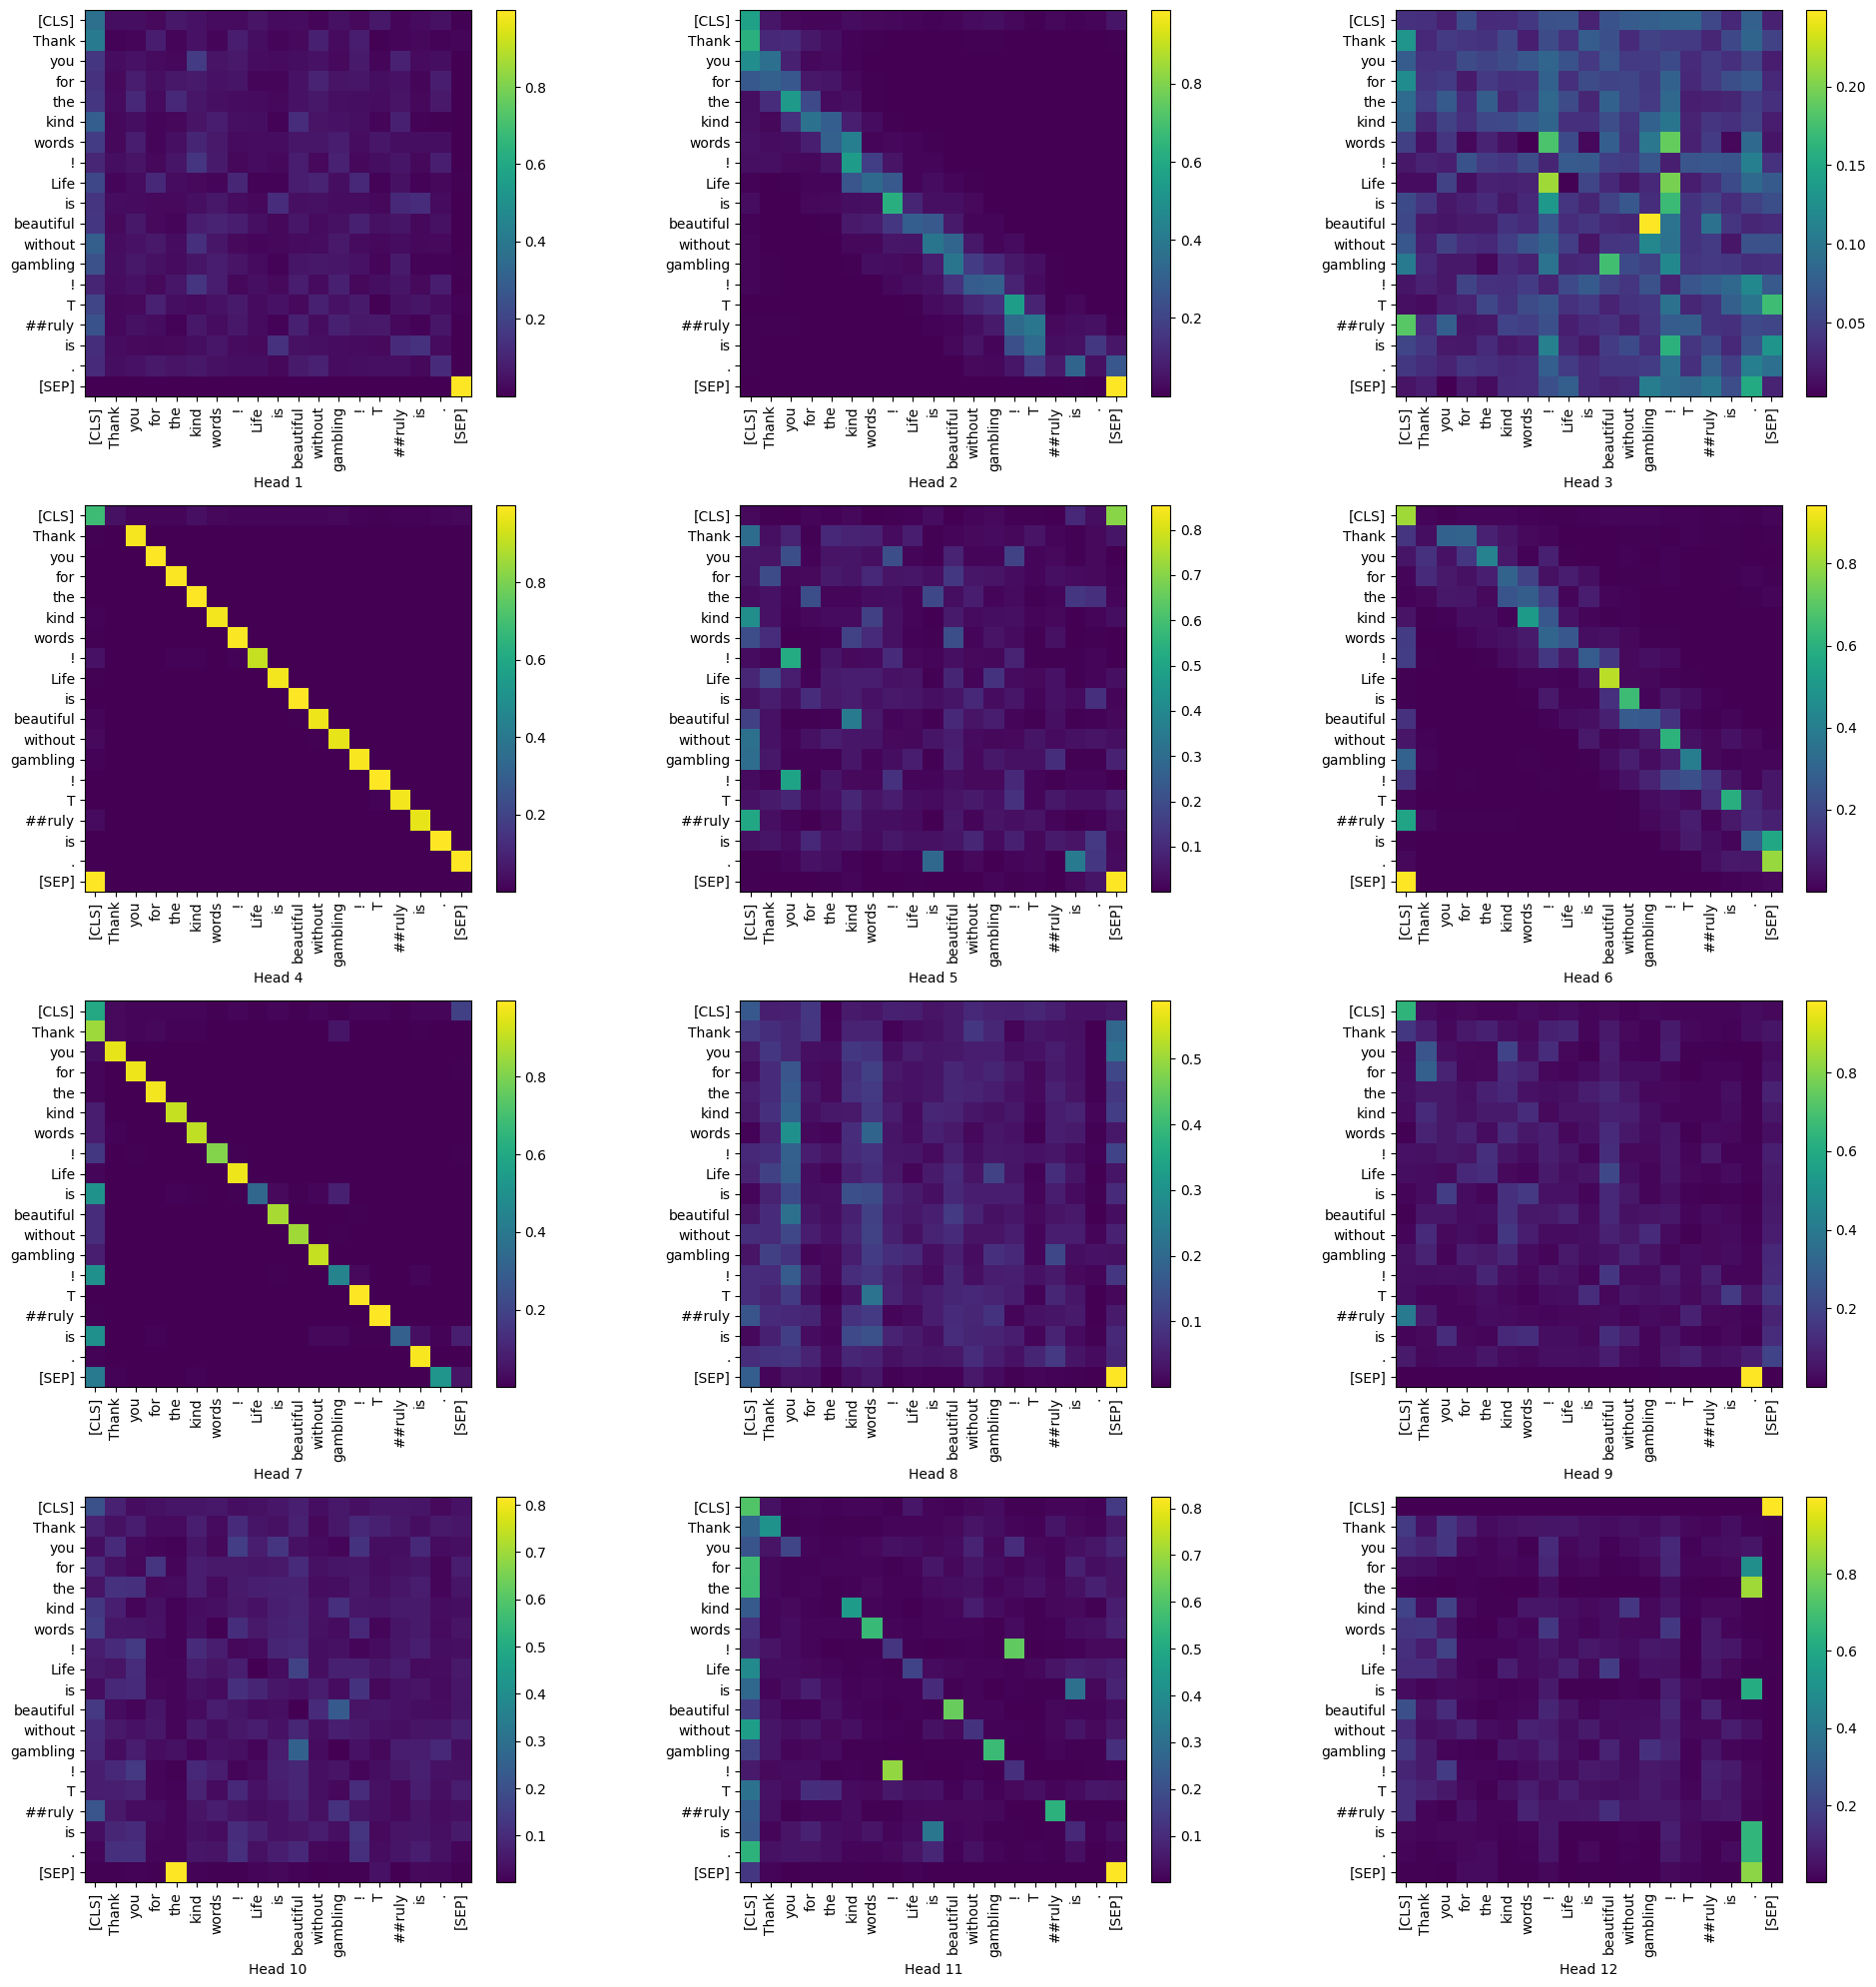

In [ ]:
visualize_token2token_scores(output_attentions_all[0].squeeze().detach().cpu().numpy())

In [ ]:
input_ids, baseline_input_ids, all_tokens = construct_input_and_baseline(no_ludo[1])
input_embeddings, ref_input_embeddings = construct_whole_bert_embeddings(input_ids, baseline_input_ids)

output_attentions_all = torch.stack(predic_model(input_embeddings)[1])

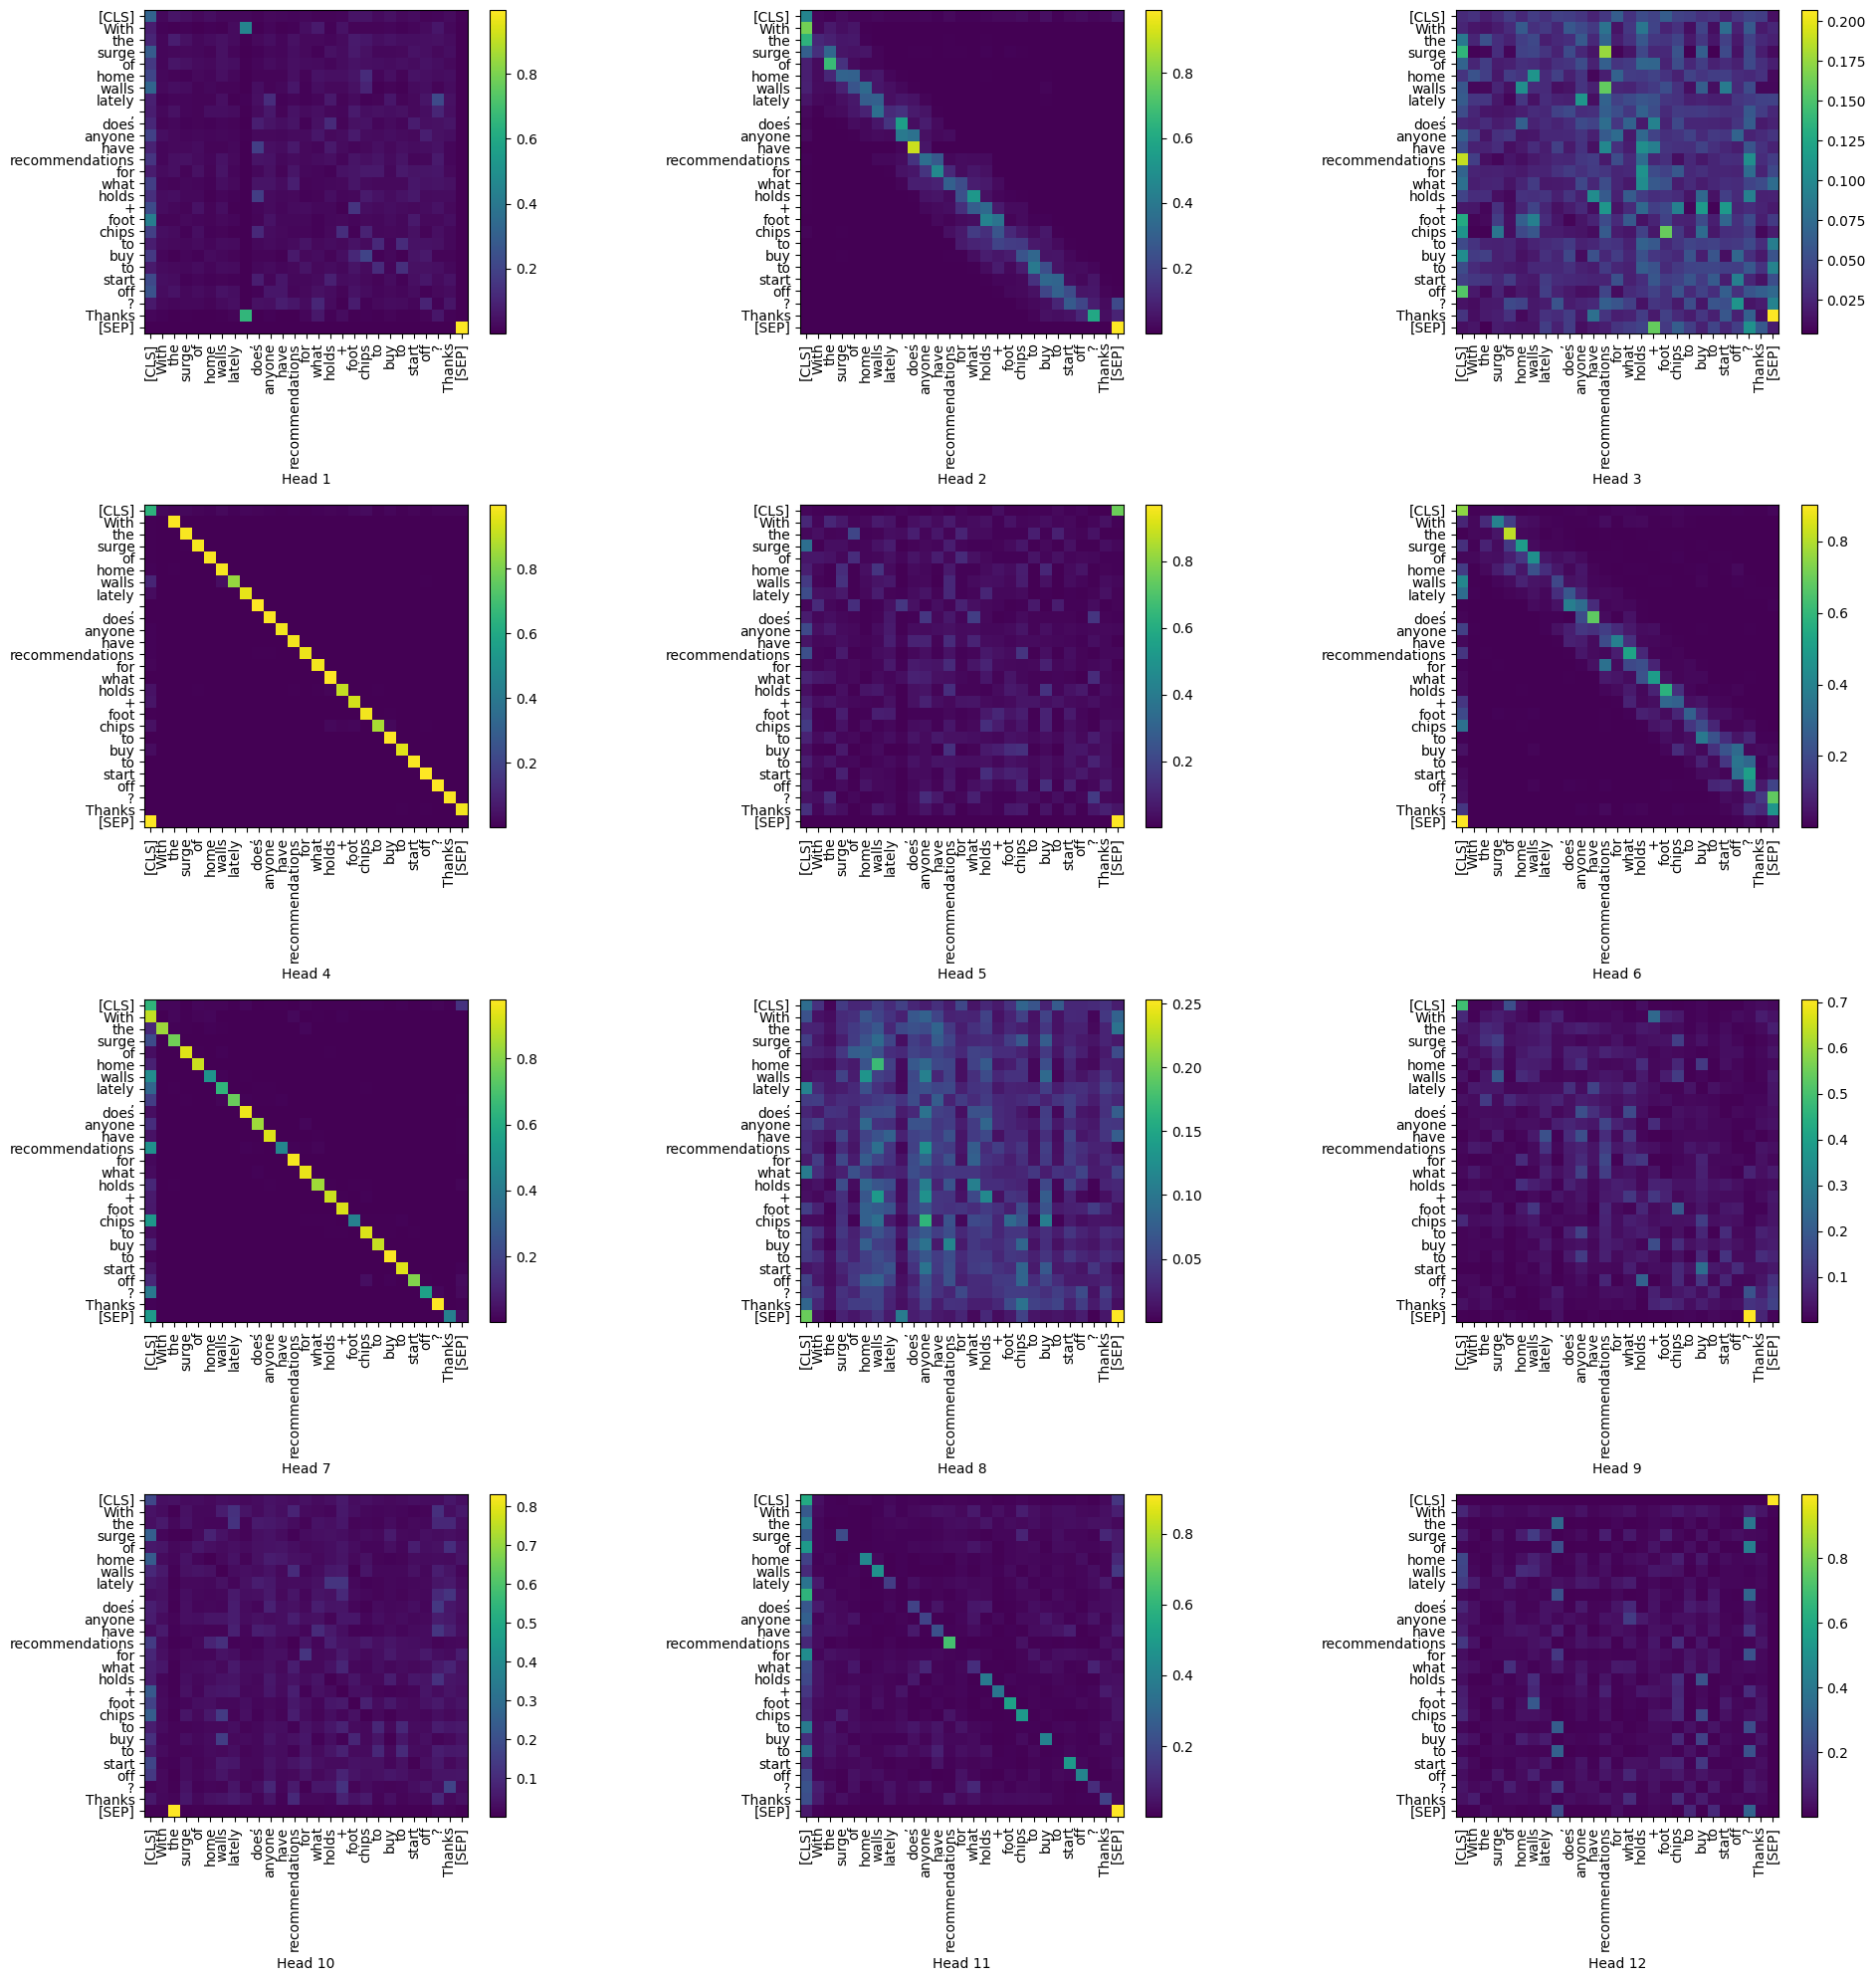

In [ ]:
visualize_token2token_scores(output_attentions_all[0].squeeze().detach().cpu().numpy())

In [ ]:
!pip install bertviz

In [ ]:
from bertviz import model_view

ludo = ["Give up your money man. Find someone, make a friend if you have to, and give them the lock to that money to safeguard it from your self. This is the only thing that worked for me. Guess what, I still have the urge to gamble, but I also don't have the urge to jump off a cliff every other week. I gave up just a bit of my pride to get back everything.",
        "Lol white American mutt. Just asking because I saw the name and I know a lot of Chinese have gambling issues. Look man, your family is definitely dissapointed, I'm sure you are as well, but they mean well and are doing that to ""correct"" you. You know what my family did? They told me it's no big deal and that maybe I should try again, but this time be ""smarter"". Trust me, Id rather have your family talking to me than mine lol, maybe I wouldn't be where I am today",
        "Oh and yeah, I'm forsure the black sheep of the family. Squandering as much work and effort as I have will do that, but that's life mane. Use it as motivation to succeed in life, and don't make the dollar almighty. It's just an illusion. Money is important,sure, but it in and of itself isn't important, it's what it allows to do that makes it important.",
        "Thank you for the kind words! Life is beautiful without gambling! Truly is."]

no_ludo = ["Hey it was a mistake. Can happen to anyone. While I understand it is so tough to get over it and forgive yourself, please dont beat yourself over it. I know the feeling of loosing a dog. Please hold it together for your daughter. Maybe you can raise awareness so people dont make the same mistake again. Im sorry what has happened to you. Im sure the dog is in a good place and has forgiven you.",
           "With the surge of home walls lately, does anyone have recommendations for what holds + foot chips to buy to start off? Thanks",
           "Just finished the LBJ documentary. Damn I wish we never got involved with Vietnam. Imagine the great society expanding even more without spending billions on that war(and the lives we could have saved). Also fuck Nixon for sabotaging the peace negotiations."]

sentence = ludo[3]
prediction = prediction_model(sentence, model, tokenizer)
print(sentence)
print(prediction)

inputs = tokenizer.encode(sentence, return_tensors='pt').to(device)  # Tokenize input text
outputs = model(inputs, output_attentions=True)
attention = outputs[-1]
tokens = tokenizer.convert_ids_to_tokens(inputs[0])
model_view(attention, tokens)

Thank you for the kind words! Life is beautiful without gambling! Truly is.
['Ludopatía']


<IPython.core.display.Javascript object>

In [ ]:
sentence = no_ludo[1]
prediction = prediction_model(sentence, model, tokenizer)
print(sentence)
print(prediction)

inputs = tokenizer.encode(sentence, return_tensors='pt').to(device)  # Tokenize input text
outputs = model(inputs, output_attentions=True)
attention = outputs[-1]
tokens = tokenizer.convert_ids_to_tokens(inputs[0])
model_view(attention, tokens)

## Analisis de tópicos de ludopatas

In [ ]:
pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 23.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.3 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039168 sha256=6362e424273e8cc6bfea10817382081227aa0655a52fbb719ec8dcd89173ef0c
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06

In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# we add this to remove stopwords
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

model = BERTopic(
    vectorizer_model=vectorizer_model,
    language='english', calculate_probabilities=True,
    verbose=True
)
topics, probs = model.fit_transform(data[data['cat'] == 'Ludopatía'].comment)

2023-12-12 12:38:25,519 - BERTopic - Embedding - Transforming documents to embeddings.


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/814 [00:00<?, ?it/s]

2023-12-12 12:39:06,145 - BERTopic - Embedding - Completed ✓
2023-12-12 12:39:06,147 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-12 12:40:29,951 - BERTopic - Dimensionality - Completed ✓
2023-12-12 12:40:29,954 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-12 12:43:50,735 - BERTopic - Cluster - Completed ✓
2023-12-12 12:43:50,752 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-12 12:43:54,035 - BERTopic - Representation - Completed ✓


In [ ]:
model.visualize_barchart()

In [ ]:
model = BERTopic(
    vectorizer_model=vectorizer_model,
    language='english', calculate_probabilities=True,
    verbose=True
)
topics, probs = model.fit_transform(data[data['cat'] == 'No ludopatía'].comment)

2023-12-12 12:45:07,648 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/814 [00:00<?, ?it/s]

2023-12-12 12:45:38,278 - BERTopic - Embedding - Completed ✓
2023-12-12 12:45:38,283 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2023-12-12 12:46:35,819 - BERTopic - Dimensionality - Completed ✓
2023-12-12 12:46:35,822 - BERTopic - Cluster - Start clustering the reduced embeddings
2023-12-12 12:49:19,815 - BERTopic - Cluster - Completed ✓
2023-12-12 12:49:19,839 - BERTopic - Representation - Extracting topics from clusters using representation models.
2023-12-12 12:49:23,906 - BERTopic - Representation - Completed ✓


In [ ]:
model.visualize_barchart()